In [2]:
import pandas as pd 
import numpy as np 

In [4]:
import kagglehub

# Download latest version of the dataset
path = kagglehub.dataset_download("mostafaabla/garbage-classification")

print("Path to dataset files:", path)


/Users/pavithrasenthilkumar/Documents/My_Codes/PROJECTS/TrashClassification_Transfer_learning/trashapp/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/pavithrasenthilkumar/Documents/My_Codes/PROJECTS/TrashClassification_Transfer_learning/trashapp/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /Users/pavithrasenthilkumar/.cache/kagglehub/datasets/mostafaabla/garbage-classification/versions/1


In [18]:
import os
    
dataset_path = path
print(os.listdir(dataset_path))


['garbage_classification']


In [19]:
dataset_path

'/Users/pavithrasenthilkumar/.cache/kagglehub/datasets/mostafaabla/garbage-classification/versions/1'

In [20]:
print("Root contents:", os.listdir(dataset_path))

Root contents: ['garbage_classification']


In [21]:
inner_path = os.path.join(dataset_path, "garbage_classification")
print("garbage_classification contents:", os.listdir(inner_path))

garbage_classification contents: ['paper', 'green-glass', 'clothes', 'metal', 'cardboard', 'other', 'others', 'trash', 'biological', 'white-glass', 'battery', 'brown-glass', 'plastic', 'shoes', 'clothes_clean']


In [22]:
os.listdir(inner_path)

['paper',
 'green-glass',
 'clothes',
 'metal',
 'cardboard',
 'other',
 'others',
 'trash',
 'biological',
 'white-glass',
 'battery',
 'brown-glass',
 'plastic',
 'shoes',
 'clothes_clean']

In [23]:
paper_waste = os.path.join(inner_path, "paper")

In [24]:
contents_paper = os.listdir(paper_waste)

In [25]:
contents_paper[0]

'paper903.jpg'

In [26]:
inner_path

'/Users/pavithrasenthilkumar/.cache/kagglehub/datasets/mostafaabla/garbage-classification/versions/1/garbage_classification'

In [27]:
inner_path

'/Users/pavithrasenthilkumar/.cache/kagglehub/datasets/mostafaabla/garbage-classification/versions/1/garbage_classification'

#### Loading the Data

In [34]:
import os

inner_path = '/Users/pavithrasenthilkumar/.cache/kagglehub/datasets/mostafaabla/garbage-classification/versions/1/garbage_classification'

for folder in os.listdir(inner_path):
    folder_path = os.path.join(inner_path, folder)
    if os.path.isdir(folder_path):
        num_images = len([f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])
        print(folder, num_images)


paper 1050
green-glass 629
clothes 0
metal 769
cardboard 891
other 4824
others 0
trash 697
biological 985
white-glass 775
battery 945
brown-glass 607
plastic 865
shoes 1991
clothes_clean 487


In [38]:
import os
from torchvision import datasets, transforms

inner_path = '/Users/pavithrasenthilkumar/.cache/kagglehub/datasets/mostafaabla/garbage-classification/versions/1/garbage_classification'

# List only non-empty folders
valid_folders = [f for f in os.listdir(inner_path)
                 if os.path.isdir(os.path.join(inner_path, f)) 
                 and len([img for img in os.listdir(os.path.join(inner_path, f)) 
                          if img.lower().endswith(('.jpg', '.jpeg', '.png'))]) > 0]

print("Folders used for dataset:", valid_folders)





Folders used for dataset: ['paper', 'green-glass', 'metal', 'cardboard', 'other', 'trash', 'biological', 'white-glass', 'battery', 'brown-glass', 'plastic', 'shoes', 'clothes_clean']


In [37]:
import os
import shutil

inner_path = '/Users/pavithrasenthilkumar/.cache/kagglehub/datasets/mostafaabla/garbage-classification/versions/1/garbage_classification'

folders_to_delete = ['clothes', 'others']

for folder in folders_to_delete:
    folder_path = os.path.join(inner_path, folder)
    if os.path.exists(folder_path):
        shutil.rmtree(folder_path)
        print(f"Deleted folder: {folder_path}")


Deleted folder: /Users/pavithrasenthilkumar/.cache/kagglehub/datasets/mostafaabla/garbage-classification/versions/1/garbage_classification/clothes
Deleted folder: /Users/pavithrasenthilkumar/.cache/kagglehub/datasets/mostafaabla/garbage-classification/versions/1/garbage_classification/others


In [39]:

# Optional: rename inner_path to temp folder with symlinks, or just ignore empty folders
dataset = datasets.ImageFolder(inner_path, transform=transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
]))

# ImageFolder will automatically ignore empty folders, so your clothes/others empty folders won't break it
print(dataset.classes)
print("Total images:", len(dataset))


['battery', 'biological', 'brown-glass', 'cardboard', 'clothes_clean', 'green-glass', 'metal', 'other', 'paper', 'plastic', 'shoes', 'trash', 'white-glass']
Total images: 15515


#### Checking Dataset Size, and Class Balance

In [40]:
inner_path

'/Users/pavithrasenthilkumar/.cache/kagglehub/datasets/mostafaabla/garbage-classification/versions/1/garbage_classification'

In [41]:
import os
from collections import Counter

inner_path = os.path.join(path, "garbage_classification")

class_counts = {}
for class_name in os.listdir(inner_path):
    class_path = os.path.join(inner_path, class_name)
    if os.path.isdir(class_path):
        class_counts[class_name] = len(os.listdir(class_path))

print("Image counts per class:")
for k, v in class_counts.items():
    print(f"{k}: {v}")

print("\nTotal images:", sum(class_counts.values()))


Image counts per class:
paper: 1050
green-glass: 629
metal: 769
cardboard: 891
other: 4824
trash: 697
biological: 985
white-glass: 775
battery: 945
brown-glass: 607
plastic: 865
shoes: 1991
clothes_clean: 487

Total images: 15515


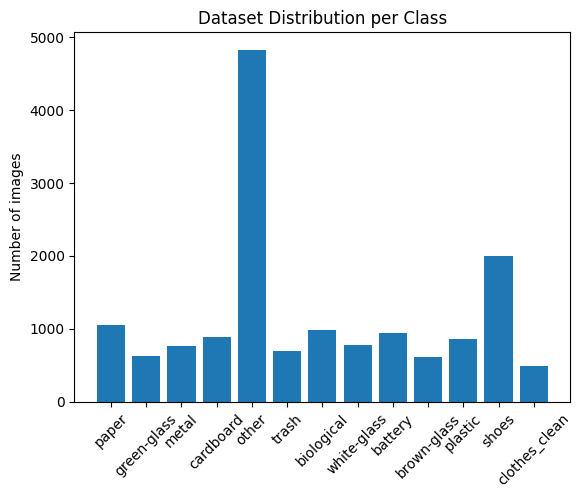

In [42]:
import matplotlib.pyplot as plt

plt.bar(class_counts.keys(), class_counts.values())
plt.xticks(rotation=45)
plt.ylabel("Number of images")
plt.title("Dataset Distribution per Class")
plt.show()


In [22]:
clothes= os.path.join(inner_path,"clothes")
clothes_items = os.listdir(clothes)

In [23]:
clothes_items[4:10]

['clothes628.jpg',
 'clothes1871.jpg',
 'clothes4909.jpg',
 'clothes1681.jpg',
 'clothes1859.jpg',
 'clothes3096.jpg']

In [51]:
import os

clothes_path = os.path.join(dataset_path, "garbage_classification", "other")
items = os.listdir(clothes_path)

print("Total images in others:", len(items))
print("Sample:", items[:20])


Total images in others: 4824
Sample: ['clothes88.jpg', 'clothes1865.jpg', 'clothes3900.jpg', 'clothes628.jpg', 'clothes4909.jpg', 'clothes1859.jpg', 'clothes2388.jpg', 'clothes600.jpg', 'clothes614.jpg', 'clothes172.jpg', 'clothes4935.jpg', 'clothes1695.jpg', 'clothes2377.jpg', 'clothes3069.jpg', 'clothes4706.jpg', 'clothes2411.jpg', 'clothes4074.jpg', 'clothes833.jpg', 'clothes2363.jpg', 'clothes3055.jpg']


In [52]:
inner_path

'/Users/pavithrasenthilkumar/.cache/kagglehub/datasets/mostafaabla/garbage-classification/versions/1/garbage_classification'

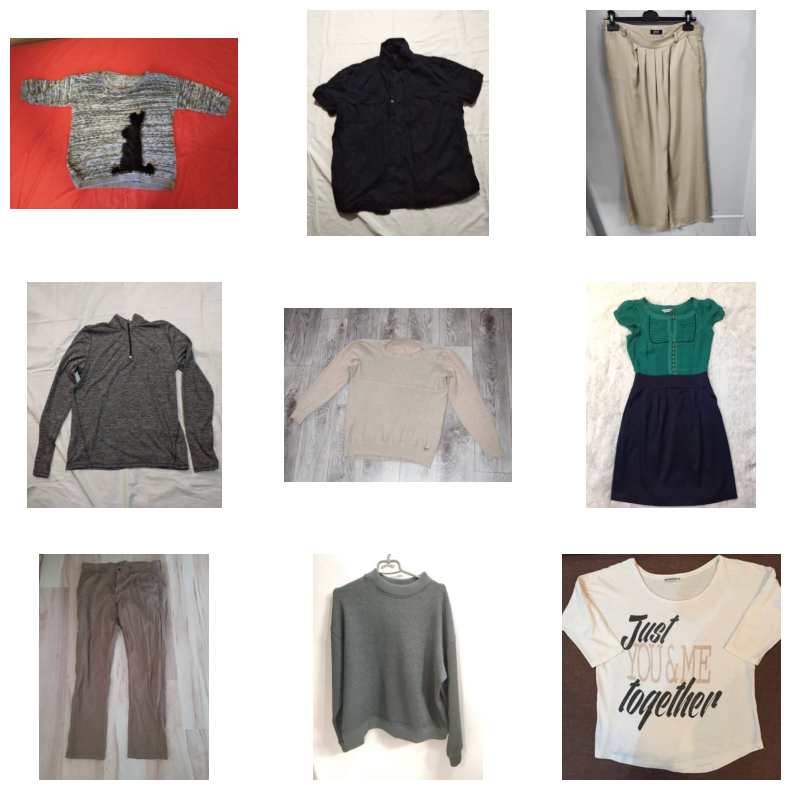

In [68]:
import os, random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# pick 9 random images
sample_files = random.sample(items, 9)

plt.figure(figsize=(10, 10))
for i, f in enumerate(sample_files):
    img = mpimg.imread(os.path.join(clothes_path, f))
    plt.subplot(3, 3, i+1)
    plt.imshow(img)
    plt.axis("off")
plt.show()

#### Loading CLIP to identify and distinguish clothes and non clothes items

In [1]:
import clip
import torch

device = "mps" if torch.backends.mps.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)


100%|███████████████████████████████████████| 338M/338M [00:10<00:00, 33.3MiB/s]


In [28]:
import os

inner_path = os.path.join(dataset_path, "garbage_classification")
for folder in ["clothes_clean", "shoes", "other"]:
    os.makedirs(os.path.join(inner_path, folder), exist_ok=True)


### Loading CLIP model to identify shoes/hats seperately from Clothes

In [30]:
import torch
import clip
from PIL import Image
import os
import shutil

device = "mps" if torch.backends.mps.is_available() else "cpu"  # M2 GPU
model, preprocess = clip.load("ViT-B/32", device=device)

labels = ["clothes_clean", "shoes", "other"]
label_tokens = clip.tokenize(labels).to(device)

clothes_path = os.path.join(inner_path,  "clothes")
files = os.listdir(clothes_path)

# Create output folders
for lbl in ["clothes_clean", "shoes", "others"]:
    os.makedirs(os.path.join(inner_path, lbl), exist_ok=True)

for f in files:
    img_path = os.path.join(clothes_path, f)
    try:
        img = preprocess(Image.open(img_path)).unsqueeze(0).to(device)
    except:
        continue  # skip unreadable files

    with torch.no_grad():
        image_features = model.encode_image(img)
        text_features = model.encode_text(label_tokens)
        similarities = (image_features @ text_features.T).softmax(dim=-1)
        pred_label = labels[similarities.argmax().item()]

    # Move to appropriate folder
    dst_path = os.path.join(inner_path,
                            "clothes_clean" if pred_label=="clothes_clean" else pred_label, f)
    shutil.move(img_path, dst_path)


In [71]:
inner_path

'/Users/pavithrasenthilkumar/.cache/kagglehub/datasets/mostafaabla/garbage-classification/versions/1/garbage_classification'

In [72]:
dataset_path

'/Users/pavithrasenthilkumar/.cache/kagglehub/datasets/mostafaabla/garbage-classification/versions/1'

In [73]:
dataset

Dataset ImageFolder
    Number of datapoints: 15515
    Root location: /Users/pavithrasenthilkumar/.cache/kagglehub/datasets/mostafaabla/garbage-classification/versions/1/garbage_classification
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )

#### Deleting others folder (represents clothes too)

In [76]:
for class_name in os.listdir(inner_path):
    print(class_name)

paper
green-glass
metal
cardboard
other
trash
biological
white-glass
battery
brown-glass
plastic
shoes
clothes_clean


In [87]:
import os

inner_path = '/Users/pavithrasenthilkumar/.cache/kagglehub/datasets/mostafaabla/garbage-classification/versions/1/garbage_classification'

for class_name in os.listdir(inner_path):
    if class_name == 'other': 
        folder_path = os.path.join(inner_path, class_name)  
        print("Deleting:", folder_path)
        if os.path.exists(folder_path):
            os.system(f'rm -rf "{folder_path}"')
            print(f"Deleted {folder_path}")


Deleting: /Users/pavithrasenthilkumar/.cache/kagglehub/datasets/mostafaabla/garbage-classification/versions/1/garbage_classification/other
Deleted /Users/pavithrasenthilkumar/.cache/kagglehub/datasets/mostafaabla/garbage-classification/versions/1/garbage_classification/other


In [88]:
for class_name in os.listdir(inner_path):
    print(class_name)

paper
green-glass
metal
cardboard
trash
biological
white-glass
battery
brown-glass
plastic
shoes
clothes_clean


In [89]:
import os
from collections import Counter

inner_path = os.path.join(path, "garbage_classification")

class_counts = {}
for class_name in os.listdir(inner_path):
    class_path = os.path.join(inner_path, class_name)
    if os.path.isdir(class_path):
        class_counts[class_name] = len(os.listdir(class_path))

print("Image counts per class:")
for k, v in class_counts.items():
    print(f"{k}: {v}")

print("\nTotal images:", sum(class_counts.values()))


Image counts per class:
paper: 1050
green-glass: 629
metal: 769
cardboard: 891
trash: 697
biological: 985
white-glass: 775
battery: 945
brown-glass: 607
plastic: 865
shoes: 1991
clothes_clean: 487

Total images: 10691


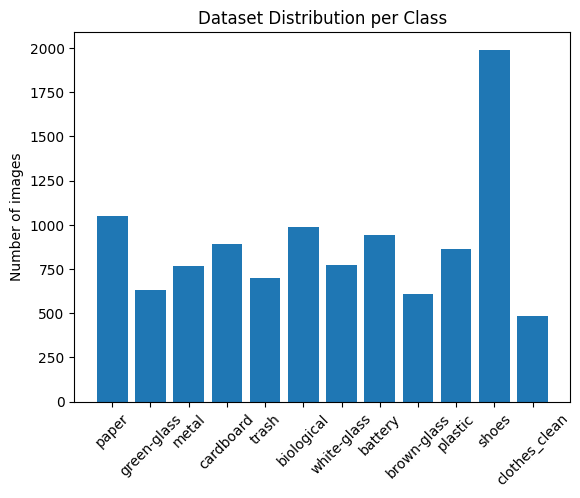

In [90]:
import matplotlib.pyplot as plt

plt.bar(class_counts.keys(), class_counts.values())
plt.xticks(rotation=45)
plt.ylabel("Number of images")
plt.title("Dataset Distribution per Class")
plt.show()
